## User Experience Analysis

In [98]:
# import required packages and modules
import sys
sys.path.insert(0,'../scripts/')

import pandas as pd
import numpy as np
from numpy import percentile

import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [99]:
# load the cleaned dataset
df = pd.read_csv('../data/cleaned_telecom_data_source.csv', index_col=0)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 61 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

In [101]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.head(1)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Data (Bytes),Social Media (Bytes),Google (Bytes),Youtube (Bytes),Netflix (Bytes),Gaming (Bytes),Email (Bytes),Other (Bytes),Social Media (MB),Google (MB),Youtube (MB),Netflix (MB),Gaming (MB),Email (MB),Other (MB),Total Data (MB)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,345629377.0,1570185.0,2905912.0,18355943.0,17855187.0,292426453.0,3701304.0,180558843.0,1.570185,2.905912,18.355943,17.855187,292.426453,3.701304,180.558843,345.629377


### Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable):
- Average TCP retransmission
- Average RTT
- Handset type
- Average throughput



In [102]:
old_df = pd.read_csv('../data/telecom_data_source.csv')
df['TCP DL Retrans. Vol (Bytes)'] = old_df['TCP DL Retrans. Vol (Bytes)']
df['TCP UL Retrans. Vol (Bytes)'] = old_df['TCP UL Retrans. Vol (Bytes)']

In [103]:
# extracting only the required features from the dataframe
user_experience_df = df[["MSISDN/Number","Avg RTT DL (ms)","Avg RTT UL (ms)",
                         "Avg Bearer TP DL (kbps)","Avg Bearer TP UL (kbps)","Handset Type",
                         "TCP DL Retrans. Vol (Bytes)","TCP UL Retrans. Vol (Bytes)"]].copy()

In [104]:
user_experience_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MSISDN/Number                150001 non-null  float64
 1   Avg RTT DL (ms)              150001 non-null  float64
 2   Avg RTT UL (ms)              150001 non-null  float64
 3   Avg Bearer TP DL (kbps)      150001 non-null  float64
 4   Avg Bearer TP UL (kbps)      150001 non-null  float64
 5   Handset Type                 150001 non-null  object 
 6   TCP DL Retrans. Vol (Bytes)  61855 non-null   float64
 7   TCP UL Retrans. Vol (Bytes)  53352 non-null   float64
dtypes: float64(7), object(1)
memory usage: 10.3+ MB


In [105]:
user_experience_df['Total Avg RTT (ms)'] = user_experience_df['Avg RTT DL (ms)'] + \
                                      user_experience_df['Avg RTT DL (ms)']

user_experience_df['Total Avg Bearer TP (kbps)'] = user_experience_df['Avg Bearer TP DL (kbps)'] + \
                                      user_experience_df['Avg Bearer TP UL (kbps)']

user_experience_df['Total Avg TCP (Bytes)'] = user_experience_df['TCP DL Retrans. Vol (Bytes)'] + \
                                      user_experience_df['TCP DL Retrans. Vol (Bytes)']
user_experience_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   MSISDN/Number                150001 non-null  float64
 1   Avg RTT DL (ms)              150001 non-null  float64
 2   Avg RTT UL (ms)              150001 non-null  float64
 3   Avg Bearer TP DL (kbps)      150001 non-null  float64
 4   Avg Bearer TP UL (kbps)      150001 non-null  float64
 5   Handset Type                 150001 non-null  object 
 6   TCP DL Retrans. Vol (Bytes)  61855 non-null   float64
 7   TCP UL Retrans. Vol (Bytes)  53352 non-null   float64
 8   Total Avg RTT (ms)           150001 non-null  float64
 9   Total Avg Bearer TP (kbps)   150001 non-null  float64
 10  Total Avg TCP (Bytes)        61855 non-null   float64
dtypes: float64(10), object(1)
memory usage: 13.7+ MB


In [106]:
user_experience_agg = user_experience_df.groupby('MSISDN/Number').agg({
    'Total Avg RTT (ms)': 'sum',
    'Total Avg TCP (Bytes)': 'sum',
    'Total Avg Bearer TP (kbps)': 'sum',
    'Handset Type': [lambda x: x.mode()[0]]})

user_experience = pd.DataFrame(columns=[
    "Total Avg RTT (ms)",
    "Total Avg TCP (Bytes)",
    "Total Avg Bearer TP (kbps)",
    "Handset Type"])

user_experience["Total Avg RTT (ms)"] = user_experience_agg["Total Avg RTT (ms)"]['sum']
user_experience["Total Avg TCP (Bytes)"] = user_experience_agg["Total Avg TCP (Bytes)"]['sum']
user_experience["Total Avg Bearer TP (kbps)"] = user_experience_agg["Total Avg Bearer TP (kbps)"]['sum']
user_experience["Handset Type"] = user_experience_agg["Handset Type"]['<lambda>']
user_experience.head()

,Total Avg RTT (ms),Total Avg TCP (Bytes),Total Avg Bearer TP (kbps),Handset Type
MSISDN/Number,,,,
3.360100e+10,92.0,0.0,76.0,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,60.0,0.0,99.0,Apple iPhone 7 (A1778)
3.360100e+10,90.0,0.0,97.0,undefined
3.360101e+10,138.0,2132.0,248.0,Apple iPhone 5S (A1457)
3.360101e+10,228.0,18699260.0,56844.0,Apple iPhone Se (A1723)


### Task 3.2 - Compute & list 10 of the top, bottom and most frequent:
- TCP values in the dataset. 
- RTT values in the dataset.
- Throughput values in the dataset.

In [107]:
# Sort Dataset by TCP Values 
sorted_by_tcp = user_experience_df.sort_values('Total Avg TCP (Bytes)', ascending=False)
top_10 = sorted_by_tcp.head(10)['Total Avg TCP (Bytes)']
last_10 = sorted_by_tcp.tail(10)['Total Avg TCP (Bytes)']
most_10 = user_experience_df['Total Avg TCP (Bytes)'].value_counts().head(10)

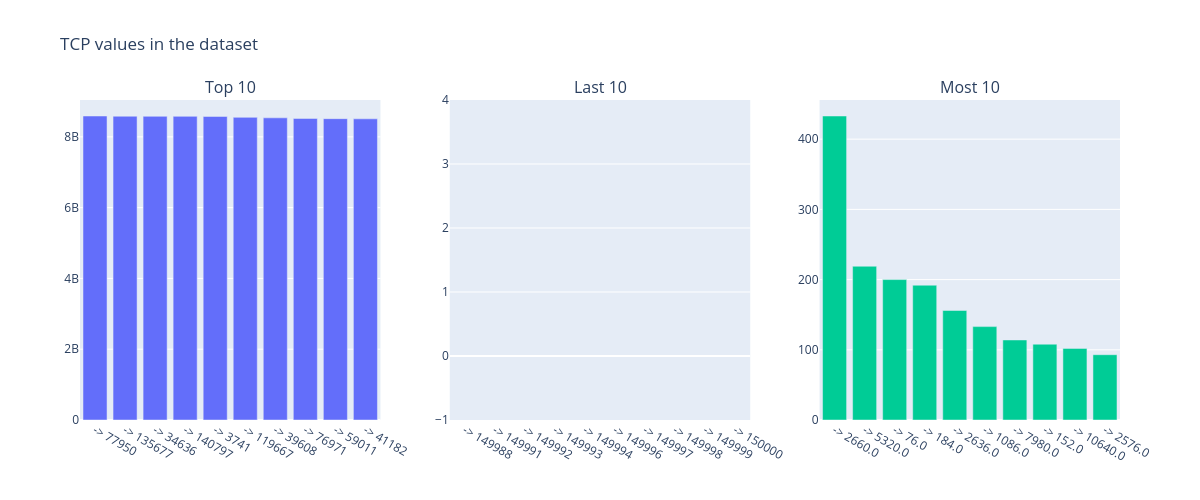

In [108]:
from data_plots import plot_mult_hist
plot_mult_hist([top_10, last_10, most_10], 1,
          3, "TCP values in the dataset", ['Top 10', 'Last 10', 'Most 10'])

### Task 3.3 - Compute & report:
The distribution of the average throughput  per handset type and provide interpretation for your findings.
The average TCP retransmission view per handset type and provide interpretation for your findings.


### Task 3.4 - Using the experience metrics above, 
- perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. 
- (The description must define each group based on your understanding of the data)